In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

In [164]:
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut

In [136]:
data = pd.read_csv('Cars93.csv')

In [137]:
X = data[['Horsepower','Turn.circle','MPG.city', 'MPG.highway', 'EngineSize','RPM', 'Rev.per.mile','Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width','Weight']]
Y = data['Price'].values.reshape(-1,1)

In [138]:
clf = linear_model.Lasso(alpha=0.1)

PARA UN ALPHA

In [139]:
clf.fit(X,Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
print(clf.intercept_)
print(clf.coef_)

[49.85129215]
[ 1.66590390e-01 -5.05060888e-01 -0.00000000e+00 -1.87333180e-01
  9.72033708e-02 -3.19011687e-03  2.32291078e-03  9.75288572e-02
 -9.84540751e-01  1.20609139e-01  5.98480340e-01 -1.44867247e+00
  5.11356668e-04]


VARIAMOS NUESTRO ALPHA

In [161]:
alpha1 = np.linspace(0.000001,20)
print(alpha1[0])

1e-06


In [162]:
betas = np.zeros((13,len(alpha1)))
score = np.zeros(len(alpha1))
for i in range(0,len(alpha1)):
    
    clf = linear_model.Lasso(alpha1[i])
    clf.fit(X,Y)
    for j in range(0,13):
        if (j == 0):
            betas[j,0] = clf.intercept_
        else:
            betas[j,i] = clf.coef_[j-1]
    score[i] = clf.score(X,Y)
print (score, betas)
    

[0.74621355 0.73656118 0.73052341 0.72068488 0.70768936 0.69198302
 0.67677532 0.65897936 0.64952239 0.6490091  0.64843543 0.64789437
 0.64783768 0.64776286 0.64768974 0.64761103 0.64752667 0.64743696
 0.64738435 0.64733208 0.64727819 0.64722053 0.64712361 0.64702321
 0.64691686 0.64680599 0.6466906  0.64657072 0.64644633 0.64631743
 0.64618401 0.6460461  0.64590367 0.64575673 0.64560528 0.64544932
 0.64528884 0.64512386 0.64495436 0.6447778  0.64459923 0.64441615
 0.64422855 0.64403644 0.64383982 0.64363868 0.64343303 0.64322287
 0.64300821 0.64278906] [[-2.32187950e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0000000

Text(0.5, 0, 'alpha')

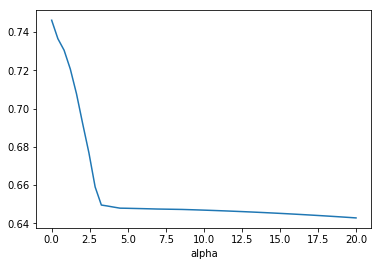

In [163]:
plt.plot(alpha1, score)
plt.xlabel('alpha')

In [171]:
loo = LeaveOneOut()
loo.get_n_splits(X,Y)
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print(X_train, X_test, y_train, y_test)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92] TEST: [0]


KeyError: '[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48\n 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72\n 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92] not in index'